In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# some utility functions

def sigmoid(z) : 
    return 1/(1 + np.exp(-z)),z

def relu(z) : 
    return np.maximum(0,z),z

def relu_backward(dA,cache):
    z = cache
    dz = np.array(dA,copy = True)
    dz[z<=0] = 0 # for z<=0 dz should be 0 
    return dz

def sigmoid_backward(dA,cache) : 
    z = cache
    s = sigmoid(z)[0]
    return dA*s *(1-s)

## 2 Layer NN 
Linear -> Relu -> Linear -> Sigmoid

In [3]:
def initalize_parameters_2LayerNN(nX,nH,nY) : 
    """
    nX = size of input layer
    nH = size of hidden layer
    nY = size of output layer
    """
    w1 = np.random.randn(nH,nX)*0.01
    w2 = np.random.randn(nY,nH) * 0.01
    b1 = np.zeros((nH,1))
    b2 = np.zeros((nY,1))
    
    params = {"w1":w1,"b1":b1,"w2":w2,"b2":b2}
    
    return params

In [4]:
params = initalize_parameters_2LayerNN(3,2,1)
params

{'w1': array([[ 0.00308047, -0.00149303, -0.00059001],
        [-0.00968522,  0.00604529,  0.02147164]]),
 'b1': array([[0.],
        [0.]]),
 'w2': array([[-0.00764779,  0.00727941]]),
 'b2': array([[0.]])}

## L Layer NN
( Linear -> Relu ) * (L-1) times -> Linear -> Sigmoid

In [5]:
def initialize_parameters_LlayerNN(layer_dims) : 
    # number of layers
    L = len(layer_dims) 
    np.random.seed(1)
    
    params = {}
    
    for l in range(1,L):
        
        # Weights per layer
        params["w" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        
        # Biases per layer
        params["b" + str(l)] = np.zeros((layer_dims[l],1))
        
    return params

In [6]:
params = initialize_parameters_LlayerNN([5,4,3,1])
params

{'w1': array([[ 0.01624345, -0.00611756, -0.00528172, -0.01072969,  0.00865408],
        [-0.02301539,  0.01744812, -0.00761207,  0.00319039, -0.0024937 ],
        [ 0.01462108, -0.02060141, -0.00322417, -0.00384054,  0.01133769],
        [-0.01099891, -0.00172428, -0.00877858,  0.00042214,  0.00582815]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'w2': array([[-0.01100619,  0.01144724,  0.00901591,  0.00502494],
        [ 0.00900856, -0.00683728, -0.0012289 , -0.00935769],
        [-0.00267888,  0.00530355, -0.00691661, -0.00396754]]),
 'b2': array([[0.],
        [0.],
        [0.]]),
 'w3': array([[-0.00687173, -0.00845206, -0.00671246]]),
 'b3': array([[0.]])}

## Forward Progpogation Mechanism

### linear forward progpogation to compute z and then apply activation mechanism

In [7]:
def linear_forward_activation(A,w,b,activation) : 
    z = np.dot(w,A) + b
    linear_cache = (A,w,b)
    if activation == 'relu' : 
        A_next,activation_cache = relu(z)
    if activation == 'sigmoid':
        A_next,activation_cache = sigmoid(z) 
    cache = (linear_cache,activation_cache)
    return A_next,cache

In [8]:
np.random.seed(2)
A,w,b = (np.random.randn(3,2),np.random.randn(1,3),np.random.randn(1,1))
A_next,cache = linear_forward_activation(A,w,b,'sigmoid')
A_next

array([[0.96890023, 0.11013289]])

## Refactoring for L layer NN

In [9]:
def L_layer_model_Forward_prop(X,params) : 

    """
    X - data, np.array of shape (input_size,#examples)
    params - params we got from initialize_parameters_LlayerNN function
    """
    # number of layers in NN, half of the total params
    L = len(params)//2 
    A = X
    
    # implementing the Linear -> Relu  (L-1) times and keeping the cache
    # for future use in backprop
        
    caches = []
    
    for l in range(1,L) : 
        
        A_prev = A
        A,cache = linear_forward_activation(A_prev,params["w" + str(l)],params["b" + str(l)],"relu")
        caches.append(cache)
    
    # implementing the last forward prop step Linear->Sigmoid
    AL,cache = linear_forward_activation(A,params["w" + str(L)],params["b" + str(L)],'sigmoid')
    caches.append(cache)
    
    return AL,caches

In [10]:
# a testcase function
def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    w1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    w2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    w3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2,
                  "w3": w3,
                  "b3": b3}
    
    return X, parameters

In [11]:
X,params = L_model_forward_test_case_2hidden()
AL,caches = L_layer_model_Forward_prop(X,params)
print("AL=",AL)
print("Cache length=",len(caches))

AL= [[0.03921668 0.70498921 0.19734387 0.04728177]]
Cache length= 3


## Cost Function 

In [12]:
def cost_function(AL,Y) : 
    
    """
    AL - the final probability vector corresponding to label predictions
    Y - the true label vector of shape (1,#examples)
    """
    m = Y.shape[1]
    # Computing loss
    terms = np.dot(Y,np.log(AL).T) + np.dot((1-Y),np.log((1-AL).T))
    cost = -1/m * np.sum(terms)
    return np.squeeze(cost)

In [13]:
Y = np.asarray([[1, 1, 0]])
AL = np.array([[.8,.9,0.4]])
print(cost_function(AL,Y))

0.2797765635793422


## Backward Propogation Mechanism

In [14]:
def linear_backward(dZ,cache) :
    """
    dZ - Gradient of cost with respect to linear output of current layer l
    cache - (A_prev,w,b) fetched from forward propogation in current layer
    """
    
    A_prev,w,b = cache
    m = A_prev.shape[1]
    
    dw = 1/m * np.dot(dZ,A_prev.T)
    db = 1/m * np.sum(dZ,axis = 1,keepdims=True)
    dA_prev = np.dot(w.T,dZ)
    
    return dA_prev,dw,db
    

In [15]:
def linear_backward_activation(dA,cache,activation) : 
    """
    dA - post activation gradient of current layer l 
    cache - (linear_cache,activation_cache)
    """
    
    linear_cache,activation_cache = cache
    
    if activation == 'relu' : 
        dZ = relu_backward(dA,activation_cache)
        dA_prev,dw,db = linear_backward(dZ,linear_cache)
    if activation == 'sigmoid' : 
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev,dw,db = linear_backward(dZ,linear_cache)

    return dA_prev,dw,db

In [16]:
# Test case for backward activation
def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

In [17]:
dAL,linear_activation_cache = linear_activation_backward_test_case()

dA_prev,dw,db = linear_backward_activation(dAL,linear_activation_cache,'sigmoid')
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dw = " + str(dw))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_backward_activation(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dw = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


## Refactoring for L layer NN 

In [18]:
def L_layer_model_Backward_prop(AL,Y,caches) : 
    """
    AL - final probability vector outputted by forward prop
    Y - True label vector
    caches - list of cache contatining cache for each layer l during the forward prop
    """
    grads = {}
    m = AL.shape[1]
    # Reshaping the Y vector to be as of AL
    Y = Y.reshape(AL.shape) # TRY IT , SEE WHY NEEDED !!!
    
    # Computing the first backprop gradient dAL
    dAL = -(np.divide(Y,AL) - np.divide((1-Y),(1-AL)))
    
    # Now we start the backprop 
    
    L = len(caches)
    
    curr_cache = caches[L-1] # the curr_cache (starting from last layer)
    # computing the first dA,dw,db from the dAL and sigmoid backward function
    grads["dA" + str(L-1)],grads["dw" + str(L)],grads["db" + str(L)] = linear_backward_activation(dAL,curr_cache,"sigmoid")
    
    
    # from L-1 th layer to 1st layer
    for l in reversed(range(L-1)) : 
        
        curr_cache = caches[l]
        dA_prev_temp,dw_temp,db_temp = linear_backward_activation(grads["dA" + str(l+1)],curr_cache,"relu")
        
        grads["dA" + str(l)] = dA_prev_temp
        grads["dw" + str(l+1)] = dw_temp
        grads["db" + str(l+1)] = db_temp
        
    return grads
        

In [19]:
# Test case for backword propogation 
def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}
    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    w1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, w1, b1), Z1)

    A2 = np.random.randn(3,2)
    w2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, w2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

In [20]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_layer_model_Backward_prop(AL,Y_assess,caches)
print ("dW1 = "+ str(grads["dw1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))     

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


## Finally updating parameters

In [21]:
def update_parameters(params,grads,learning_rate):
    
    L = len(params)//2
    
    for l in range(L):
        params["w" + str(l+1)] = params["w" + str(l+1)] - learning_rate * (grads["dw" + str(l+1)])
        params["b" + str(l+1)] = params["b" + str(l+1)] - learning_rate * (grads["db" + str(l+1)])
        
    return params

In [22]:
# test case for parameter updation
def update_params_test_case(): 
    np.random.seed(2)
    w1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    w2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"w1": w1,
                  "b1": b1,
                  "w2": w2,
                  "b2": b2}
    np.random.seed(3)
    dw1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dw2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2}
    
    return parameters, grads


In [23]:
params,grads = update_params_test_case()
params = update_parameters(params,grads,0.1)
print(params)
print(grads)

{'w1': array([[-0.59562069, -0.09991781, -2.14584584,  1.82662008],
       [-1.76569676, -0.80627147,  0.51115557, -1.18258802],
       [-1.0535704 , -0.86128581,  0.68284052,  2.20374577]]), 'b1': array([[-0.04659241],
       [-1.28888275],
       [ 0.53405496]]), 'w2': array([[-0.55569196,  0.0354055 ,  1.32964895]]), 'b2': array([[-0.84610769]])}
{'dw1': array([[ 1.78862847,  0.43650985,  0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898, -0.08274148, -0.62700068],
       [-0.04381817, -0.47721803, -1.31386475,  0.88462238]]), 'db1': array([[0.88131804],
       [1.70957306],
       [0.05003364]]), 'dw2': array([[-0.40467741, -0.54535995, -1.54647732]]), 'db2': array([[0.98236743]])}


# Time to Create a Model

## loading dataset 

In [24]:
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [25]:
def load_dataset():
    train_dataset = h5py.File('cat_datasets/train_catvnoncat.h5',"r")
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])
    
    test_dataset = h5py.File('cat_datasets/test_catvnoncat.h5',"r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:])
    
    train_y = train_y.reshape(1,train_y.shape[0])
    test_y = test_y.reshape(1,test_y.shape[0])
    
    return train_x,train_y,test_x,test_y,classes

In [26]:
train_x_orig,train_y,test_x_orig,test_y,classes = load_dataset()

y = 0. It's a non-cat picture.


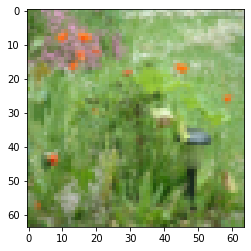

In [27]:
index = np.random.randint(0,len(train_x_orig))
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [28]:
m_train = train_x_orig.shape[0]
num_ps = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [29]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T

test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

In [30]:
# Standardizing data to have feature values between 0 and 1 as max pixel in an image is 255
train_x = train_x_flatten/255
test_x = test_x_flatten/255

In [31]:
train_x.shape,test_x.shape

((12288, 209), (12288, 50))

# Deep learning methodology to build the model
1. Initialize parameters / Define hyperparameters

   <br>
2. Loop for num_iterations :<br>
    a. Forward propagation<br>
    b. Compute cost function<br>
    c. Backward propagation<br>
    d. Update parameters (using parameters, and grads from backprop)<br>
   <br>
4. Use trained parameters to predict labels


# Two Layer NN
Linear -> Relu -> Linear -> Sigmoid

initalize_parameters_2LayerNN(nX,nH,nY)
linear_forward_activation(A,w,b,activation)
compute_cost(AL,Y)
linear_backward_activation(dA,cache,activation)
update_parameters(params,grads,learning_rate)


In [32]:
train_x.shape

(12288, 209)

In [33]:
nX = train_x.shape[0]
nH = 7
nY=  1
layers_dims = (nX,nH,nY)

In [34]:
def Two_Layer_Model(X,Y,layers_dims,learning_rate = 0.0075,num_iterations = 3000,print_cost = False) : 
    
    grads = {}
    costs = []
    m = X.shape[1]
    (nX,nH,nY) = layers_dims
    
    params = initalize_parameters_2LayerNN(nX,nH,nY)
    
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    # Gradient Descent
    
    for i in range(num_iterations) : 

        # Forward Propogation
        
        A1,cache1 = linear_forward_activation(X,w1,b1,'relu')
        A2,cache2 = linear_forward_activation(A1,w2,b2,'sigmoid')
        
        # Cost computation
        cost = cost_function(A2,Y)
        
        # Backward Propogation
        dA2 = -(np.divide(Y,A2) - np.divide((1-Y),(1-A2)))
        
        dA1,dw2,db2 = linear_backward_activation(dA2,cache2,'sigmoid')
        dA0,dw1,db1 = linear_backward_activation(dA1,cache1,'relu')
        
        # setting grads
        grads['dw1'] = dw1
        grads['db1'] = db1
        grads['dw2'] = dw2
        grads['db2'] = db2
        
        # updating params
        params = update_parameters(params,grads,learning_rate)
        
        # retrieving updated params
        w1 = params['w1']
        b1 = params['b1']
        w2 = params['w2']
        b2 = params['b2']
        
        # printing cost every 100th training example
        if print_cost and i%100==0:
            print("cost after iteration {} : {}".format(i,np.squeeze(cost)))
            
        if print_cost and i%100==0:
            costs.append(cost)
            
    # Plotting cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration (per 100)')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()       
        
    return params
        
        

cost after iteration 0 : 0.6928635256274333
cost after iteration 100 : 0.6461296634321673
cost after iteration 200 : 0.6318864267240804
cost after iteration 300 : 0.6002993938924782
cost after iteration 400 : 0.5551582292667354
cost after iteration 500 : 0.5012175056167325
cost after iteration 600 : 0.44199139290079487
cost after iteration 700 : 0.3826003011601113
cost after iteration 800 : 0.3560378931659462
cost after iteration 900 : 0.33714892101068894
cost after iteration 1000 : 0.30360245611391223
cost after iteration 1100 : 0.23690464531042313
cost after iteration 1200 : 0.2116431400070725
cost after iteration 1300 : 0.18024568595574358
cost after iteration 1400 : 0.15097158281204967
cost after iteration 1500 : 0.1264084936273641
cost after iteration 1600 : 0.09979479683825734
cost after iteration 1700 : 0.08194324604106969
cost after iteration 1800 : 0.0682664795409177
cost after iteration 1900 : 0.05997463677848483
cost after iteration 2000 : 0.04870216596125383
cost after iter

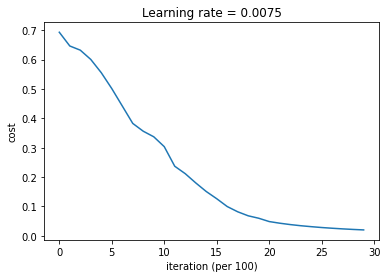

In [35]:
parameters = Two_Layer_Model(train_x, train_y, layers_dims = (nX,nH,nY), num_iterations = 3000, print_cost=True)

In [36]:
def predict(X,Y,params) : 
    m = X.shape[1]
    n = len(params) // 2
    p = np.zeros((1,m))
    probs,caches = L_layer_model_Forward_prop(X,params)
    
    # convert probs to 0/1 predictions
    for i in range(0,probs.shape[1]):
        if probs[0,i] > 0.5 : 
            p[0,i] = 1
        else :
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == Y)/m)))
        
    return p

In [37]:
predictions_train = predict(train_x,train_y,parameters)

Accuracy: 0.9999999999999998


In [38]:
predictions_test = predict(test_x,test_y,parameters)

Accuracy: 0.7000000000000001


# L Layer NN 
[Linear -> Relu ] x (L-1) times -> [Linear -> Sigmoid]

initialize_parameters_LlayerNN(layer_dims)
L_layer_model_Forward_prop(X,params)  
cost_function(AL,Y)   
L_layer_model_Backward_prop(AL,Y,caches)   
update_parameters(params,grads,learning_rate)

In [44]:
L_layers_dims = [12288,30,15,7,1]

In [50]:
def initialize_parameters_LlayerNN(layer_dims) : 
    # Changed the weigths per layer *0.01 to /np.sqrt(layer_dims[l-1])
    
    # number of layers
    L = len(layer_dims) 
    np.random.seed(1)    
    params = {}
    
    for l in range(1,L):
        
        # Weights per layer
        params["w" + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])/np.sqrt(layer_dims[l-1])
        
        # Biases per layer
        params["b" + str(l)] = np.zeros((layer_dims[l],1))
        
    return params

In [46]:
def L_Layer_Model(X,Y,L_layers_dims,learning_rate = 0.009,num_iterations = 3000,print_cost = False):
    
   
    costs = []
    
    # initalizing params 
    params = initialize_parameters_LlayerNN(L_layers_dims)
    
    # Gradient descent
    for i in range(0,num_iterations) : 
        
        # Forward propogation
        AL,caches = L_layer_model_Forward_prop(X,params)
        
        # Cost computation
        cost = cost_function(AL,Y)
        
        # Backward propogation
        grads = L_layer_model_Backward_prop(AL,Y,caches)
        
        # Updating parameters
        params = update_parameters(params,grads,learning_rate)
        
        if print_cost and i%100 == 0:
            print("Cost after iteratio
                  n %i : %f"%(i,cost))
        if print_cost and i%100 == 0:    
            costs.append(cost)

    # plotting the cost
    plt.plot(np.squeeze(costs))
    plt.xlabel('cost')
    plt.ylabel('iteration (per 100)')
    plt.title('Learning rate : {}'.format(learning_rate))
    plt.show()
    
    return params


SyntaxError: EOL while scanning string literal (<ipython-input-46-db2abcd8a8e4>, line 25)

Cost after iteration 0 : 0.697061
Cost after iteration 100 : 0.622205
Cost after iteration 200 : 0.543083
Cost after iteration 300 : 0.466725
Cost after iteration 400 : 0.394039
Cost after iteration 500 : 0.332412
Cost after iteration 600 : 0.265048
Cost after iteration 700 : 0.224890
Cost after iteration 800 : 0.095840
Cost after iteration 900 : 0.057267
Cost after iteration 1000 : 0.036193
Cost after iteration 1100 : 0.024596
Cost after iteration 1200 : 0.017837
Cost after iteration 1300 : 0.013607
Cost after iteration 1400 : 0.010790
Cost after iteration 1500 : 0.008804
Cost after iteration 1600 : 0.007358
Cost after iteration 1700 : 0.006262
Cost after iteration 1800 : 0.005418
Cost after iteration 1900 : 0.004746
Cost after iteration 2000 : 0.004205
Cost after iteration 2100 : 0.003761
Cost after iteration 2200 : 0.003390
Cost after iteration 2300 : 0.003078
Cost after iteration 2400 : 0.002813


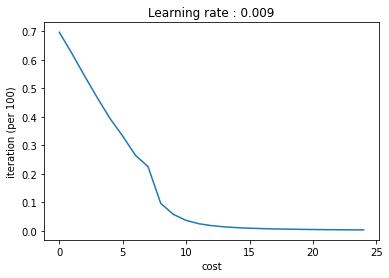

In [47]:
parameters = L_Layer_Model(train_x,train_y,L_layers_dims,learning_rate = 0.009,num_iterations=2500,print_cost=True)

In [51]:
pred_train = predict(train_x,train_y,parameters)

Accuracy: 0.9999999999999998


In [52]:
pred_test = predict(test_x,test_y,parameters)

Accuracy: 0.78
